In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data  analysis/Marketing_Analysis (1).csv',header=2)
df=data.copy()

In [ ]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 19)

In [ ]:
df.ndim

2

In [ ]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


# DATA CLEANING


In [ ]:
df.describe(include='all')

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,45211.000000,45191.000000,45211.000000,45211.000000,45211,45211,45211,45211,45211,45211,45211,45211.000000,45161,45211,45211.000000,45211.000000,45211.000000,45211,45181
unique,NaN,NaN,NaN,NaN,3,48,2,2,2,2,3,NaN,12,2646,NaN,NaN,NaN,4,2
top,NaN,NaN,NaN,NaN,married,"management,tertiary",yes,no,yes,no,cellular,NaN,"may, 2017",1.5 min,NaN,NaN,NaN,unknown,no
freq,NaN,NaN,NaN,NaN,27214,7801,37091,44396,25130,37967,29285,NaN,13747,138,NaN,NaN,NaN,36959,39894
mean,22606.000000,40.935651,57006.171065,1362.272058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.806419,NaN,NaN,2.763841,40.197828,0.580323,NaN,NaN
std,13051.435847,10.619198,32085.718415,3044.765829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.322476,NaN,NaN,3.098021,100.128746,2.303441,NaN,NaN
min,1.000000,18.000000,0.000000,-8019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN
25%,11303.500000,33.000000,20000.000000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000,-1.000000,0.000000,NaN,NaN
50%,22606.000000,39.000000,60000.000000,448.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,2.000000,-1.000000,0.000000,NaN,NaN
75%,33908.500000,48.000000,70000.000000,1428.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [ ]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [ ]:
df.drop(['customerid','pdays','default','poutcome','campaign'],axis=1,inplace=True)

In [ ]:
df.head()

,age,salary,balance,marital,jobedu,targeted,housing,loan,contact,day,month,duration,previous,response
0,58.0,100000,2143,married,"management,tertiary",yes,yes,no,unknown,5,"may, 2017",261 sec,0,no
1,44.0,60000,29,single,"technician,secondary",yes,yes,no,unknown,5,"may, 2017",151 sec,0,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,yes,yes,unknown,5,"may, 2017",76 sec,0,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,yes,no,unknown,5,"may, 2017",92 sec,0,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,unknown,5,"may, 2017",198 sec,0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   housing   45211 non-null  object 
 7   loan      45211 non-null  object 
 8   contact   45211 non-null  object 
 9   day       45211 non-null  int64  
 10  month     45161 non-null  object 
 11  duration  45211 non-null  object 
 12  previous  45211 non-null  int64  
 13  response  45181 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.8+ MB


In [ ]:
df.isna().sum()

age         20
salary       0
balance      0
marital      0
jobedu       0
targeted     0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
previous     0
response    30
dtype: int64

In [ ]:
df.replace("?",np.nan,inplace=True)

In [ ]:
df.head()

,age,salary,balance,marital,jobedu,targeted,housing,loan,contact,day,month,duration,previous,response
0,58.0,100000,2143,married,"management,tertiary",yes,yes,no,unknown,5,"may, 2017",261 sec,0,no
1,44.0,60000,29,single,"technician,secondary",yes,yes,no,unknown,5,"may, 2017",151 sec,0,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,yes,yes,unknown,5,"may, 2017",76 sec,0,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,yes,no,unknown,5,"may, 2017",92 sec,0,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,unknown,5,"may, 2017",198 sec,0,no


# DATA  WRANGLING

In [ ]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'previous', 'response'],
      dtype='object')

In [ ]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_features

['marital',
 'jobedu',
 'targeted',
 'housing',
 'loan',
 'contact',
 'month',
 'duration',
 'response']

In [ ]:
df_categorical = pd.DataFrame(df[categorical_features],columns = categorical_features)
df_categorical.head()

,marital,jobedu,targeted,housing,loan,contact,month,duration,response
0,married,"management,tertiary",yes,yes,no,unknown,"may, 2017",261 sec,no
1,single,"technician,secondary",yes,yes,no,unknown,"may, 2017",151 sec,no
2,married,"entrepreneur,secondary",yes,yes,yes,unknown,"may, 2017",76 sec,no
3,married,"blue-collar,unknown",no,yes,no,unknown,"may, 2017",92 sec,no
4,single,"unknown,unknown",no,no,no,unknown,"may, 2017",198 sec,no


In [ ]:
for feature in df.columns:
    print(feature,":",df[feature].unique(),"\n")

age : [58. 44. 33. 47. 35. 28. 42. 43. 41. 29. 53. 57. 51. 45. 60. 56. 32. 25.
 40. 39. 52. 46. 36. 49. 59. 37. 50. 54. 55. 48. 24. 38. 31. 30. 27. 34.
 23. 26. nan 61. 22. 21. 20. 66. 62. 83. 75. 67. 70. 65. 68. 64. 69. 72.
 71. 19. 76. 85. 63. 90. 82. 73. 74. 78. 80. 94. 79. 77. 86. 95. 81. 18.
 89. 84. 87. 92. 93. 88.] 

salary : [100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000] 

balance : [ 2143    29     2 ...  8205 14204 16353] 

marital : ['married' 'single' 'divorced'] 

jobedu : ['management,tertiary' 'technician,secondary' 'entrepreneur,secondary'
 'blue-collar,unknown' 'unknown,unknown' 'entrepreneur,tertiary'
 'retired,primary' 'admin.,secondary' 'technician,unknown'
 'services,secondary' 'admin.,unknown' 'blue-collar,primary'
 'blue-collar,secondary' 'management,secondary' 'retired,secondary'
 'retired,unknown' 'admin.,primary' 'self-employed,tertiary'
 'services,primary' 'admin.,tertiary' 'retired,tertiary'
 'technician,tertiary' 'self-emplo

In [ ]:
df['jobedu'].value_counts()

management,tertiary        7801
blue-collar,secondary      5371
technician,secondary       5229
admin.,secondary           4219
blue-collar,primary        3758
services,secondary         3457
technician,tertiary        1968
management,secondary       1121
retired,secondary           984
self-employed,tertiary      833
retired,primary             795
unemployed,secondary        728
entrepreneur,tertiary       686
housemaid,primary           627
self-employed,secondary     577
admin.,tertiary             572
entrepreneur,secondary      542
student,secondary           508
blue-collar,unknown         454
housemaid,secondary         395
retired,tertiary            366
services,primary            345
management,primary          294
unemployed,tertiary         289
unemployed,primary          257
management,unknown          242
technician,unknown          242
student,tertiary            223
admin.,primary              209
services,tertiary           202
entrepreneur,primary        183
housemai

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
numerical_features

['age', 'salary', 'balance', 'day', 'previous']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   housing   45211 non-null  object 
 7   loan      45211 non-null  object 
 8   contact   45211 non-null  object 
 9   day       45211 non-null  int64  
 10  month     45161 non-null  object 
 11  duration  45211 non-null  object 
 12  previous  45211 non-null  int64  
 13  response  45181 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 4.8+ MB


In [ ]:
H=pd.to_numeric(df['age'])
H

0        58.0
1        44.0
2        33.0
3        47.0
4        33.0
5        35.0
6        28.0
7        42.0
8        58.0
9        43.0
10       41.0
11       29.0
12       53.0
13       58.0
14       57.0
15       51.0
16       45.0
17       57.0
18       60.0
19       33.0
20       28.0
21       56.0
22       32.0
23       25.0
24       40.0
25       44.0
26       39.0
27       52.0
28       46.0
29       36.0
30       57.0
31       49.0
32       60.0
33       59.0
34       51.0
35       57.0
36       25.0
37       53.0
38       36.0
39       37.0
40       44.0
41       50.0
42       60.0
43       54.0
44       58.0
45       36.0
46       58.0
47       44.0
48       55.0
49       29.0
50       54.0
51       48.0
52       32.0
53       42.0
54       24.0
55       38.0
56       38.0
57       47.0
58       40.0
59       46.0
60       32.0
61       53.0
62       57.0
63       33.0
64       49.0
65       51.0
66       60.0
67       59.0
68       55.0
69       35.0
70       57.0
71    

In [ ]:
df.head()

,age,salary,balance,marital,jobedu,targeted,housing,loan,contact,day,month,duration,previous,response
0,58.0,100000,2143,married,"management,tertiary",yes,yes,no,unknown,5,"may, 2017",261 sec,0,no
1,44.0,60000,29,single,"technician,secondary",yes,yes,no,unknown,5,"may, 2017",151 sec,0,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,yes,yes,unknown,5,"may, 2017",76 sec,0,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,yes,no,unknown,5,"may, 2017",92 sec,0,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,unknown,5,"may, 2017",198 sec,0,no


In [ ]:
cor=df.corr()
cor

,age,salary,balance,day,previous
age,1.000000,0.024374,0.097755,-0.009184,0.001330
salary,0.024374,1.000000,0.055469,0.027864,0.014564
balance,0.097755,0.055469,1.000000,0.004503,0.016674
day,-0.009184,0.027864,0.004503,1.000000,-0.051710
previous,0.001330,0.014564,0.016674,-0.051710,1.000000


In [ ]:
df1=pd.DataFrame(df[numerical_features])
df1.head()

,age,salary,balance,day,previous
0,58.0,100000,2143,5,0
1,44.0,60000,29,5,0
2,33.0,120000,2,5,0
3,47.0,20000,1506,5,0
4,33.0,0,1,5,0


In [ ]:
df1.columns

Index(['age', 'salary', 'balance', 'day', 'previous'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)
df_numerical = pd.DataFrame(scaled_data,columns = df1.columns)
df_numerical.head()

,age,salary,balance,day,previous
0,0.519481,0.833333,0.092259,0.133333,0.0
1,0.337662,0.500000,0.073067,0.133333,0.0
2,0.194805,1.000000,0.072822,0.133333,0.0
3,0.376623,0.166667,0.086476,0.133333,0.0
4,0.194805,0.000000,0.072812,0.133333,0.0


In [ ]:
df = pd.concat([df,df_categorical],axis = 1)
df.head()

,age,salary,balance,day,previous,marital,jobedu,targeted,housing,loan,contact,month,duration,response,marital,jobedu,targeted,housing,loan,contact,month,duration,response
0,0.519481,0.833333,0.092259,0.133333,0.0,married,"management,tertiary",yes,yes,no,unknown,"may, 2017",261 sec,no,married,"management,tertiary",yes,yes,no,unknown,"may, 2017",261 sec,no
1,0.337662,0.500000,0.073067,0.133333,0.0,single,"technician,secondary",yes,yes,no,unknown,"may, 2017",151 sec,no,single,"technician,secondary",yes,yes,no,unknown,"may, 2017",151 sec,no
2,0.194805,1.000000,0.072822,0.133333,0.0,married,"entrepreneur,secondary",yes,yes,yes,unknown,"may, 2017",76 sec,no,married,"entrepreneur,secondary",yes,yes,yes,unknown,"may, 2017",76 sec,no
3,0.376623,0.166667,0.086476,0.133333,0.0,married,"blue-collar,unknown",no,yes,no,unknown,"may, 2017",92 sec,no,married,"blue-collar,unknown",no,yes,no,unknown,"may, 2017",92 sec,no
4,0.194805,0.000000,0.072812,0.133333,0.0,single,"unknown,unknown",no,no,no,unknown,"may, 2017",198 sec,no,single,"unknown,unknown",no,no,no,unknown,"may, 2017",198 sec,no


# UNIVARIATE  ANALYSIS

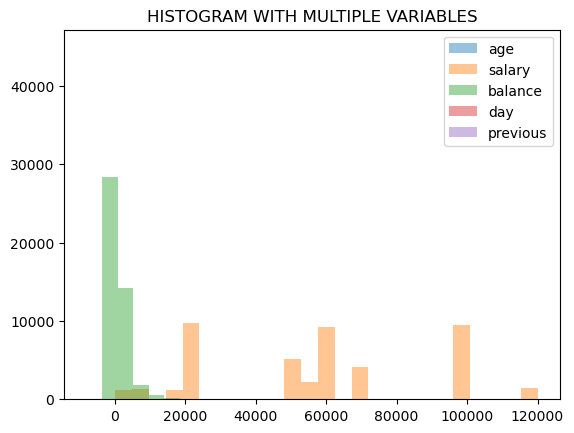

In [ ]:
plt.hist(df['age'],bins=25,alpha=0.45)
plt.hist(df['salary'],bins=25,alpha=0.45)
plt.hist(df['balance'],bins=25,alpha=0.45)
plt.hist(df['day'],bins=25,alpha=0.45)
plt.hist(df['previous'],bins=25,alpha=0.45)

plt.title("HISTOGRAM WITH MULTIPLE VARIABLES")
plt.legend(['age','salary','balance','day','previous'])
plt.show()

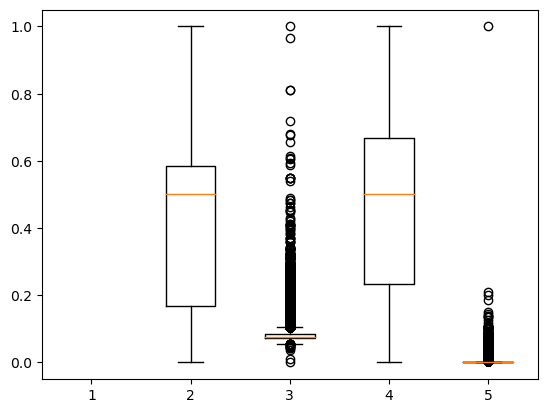

In [ ]:
plt.boxplot(df_numerical)
plt.show()

In [ ]:
df = df_numerical.copy()

        REMOVING OUTLIERS 

In [ ]:
for feature in df.columns:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1-1.5*IQR
    upper_fence = Q3+1.5*IQR
    for i in range(len(df)):
        outlier = df[feature][i]
        if outlier > upper_fence:
            df[feature][i] = upper_fence
        elif outlier < lower_fence:
            df[feature][i] = lower_fence

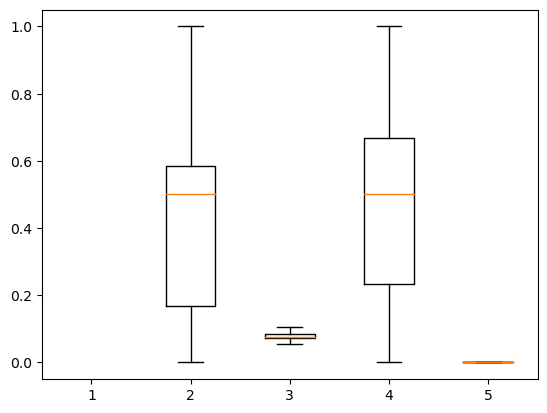

In [ ]:
plt.boxplot(df)
plt.show()

In [ ]:
x1=df['salary']
y1=df['balance']

# BIVARIATE  ANALYSIS

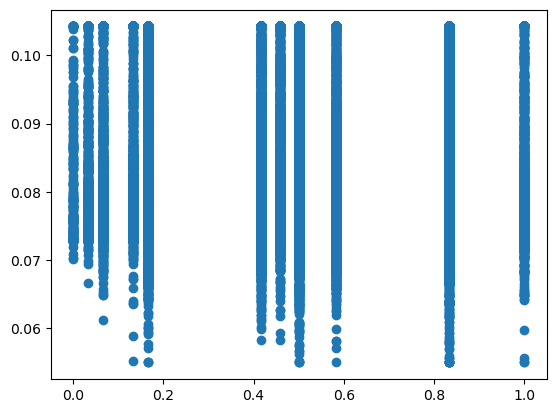

In [ ]:
plt.scatter(x1,y1)
plt.show()

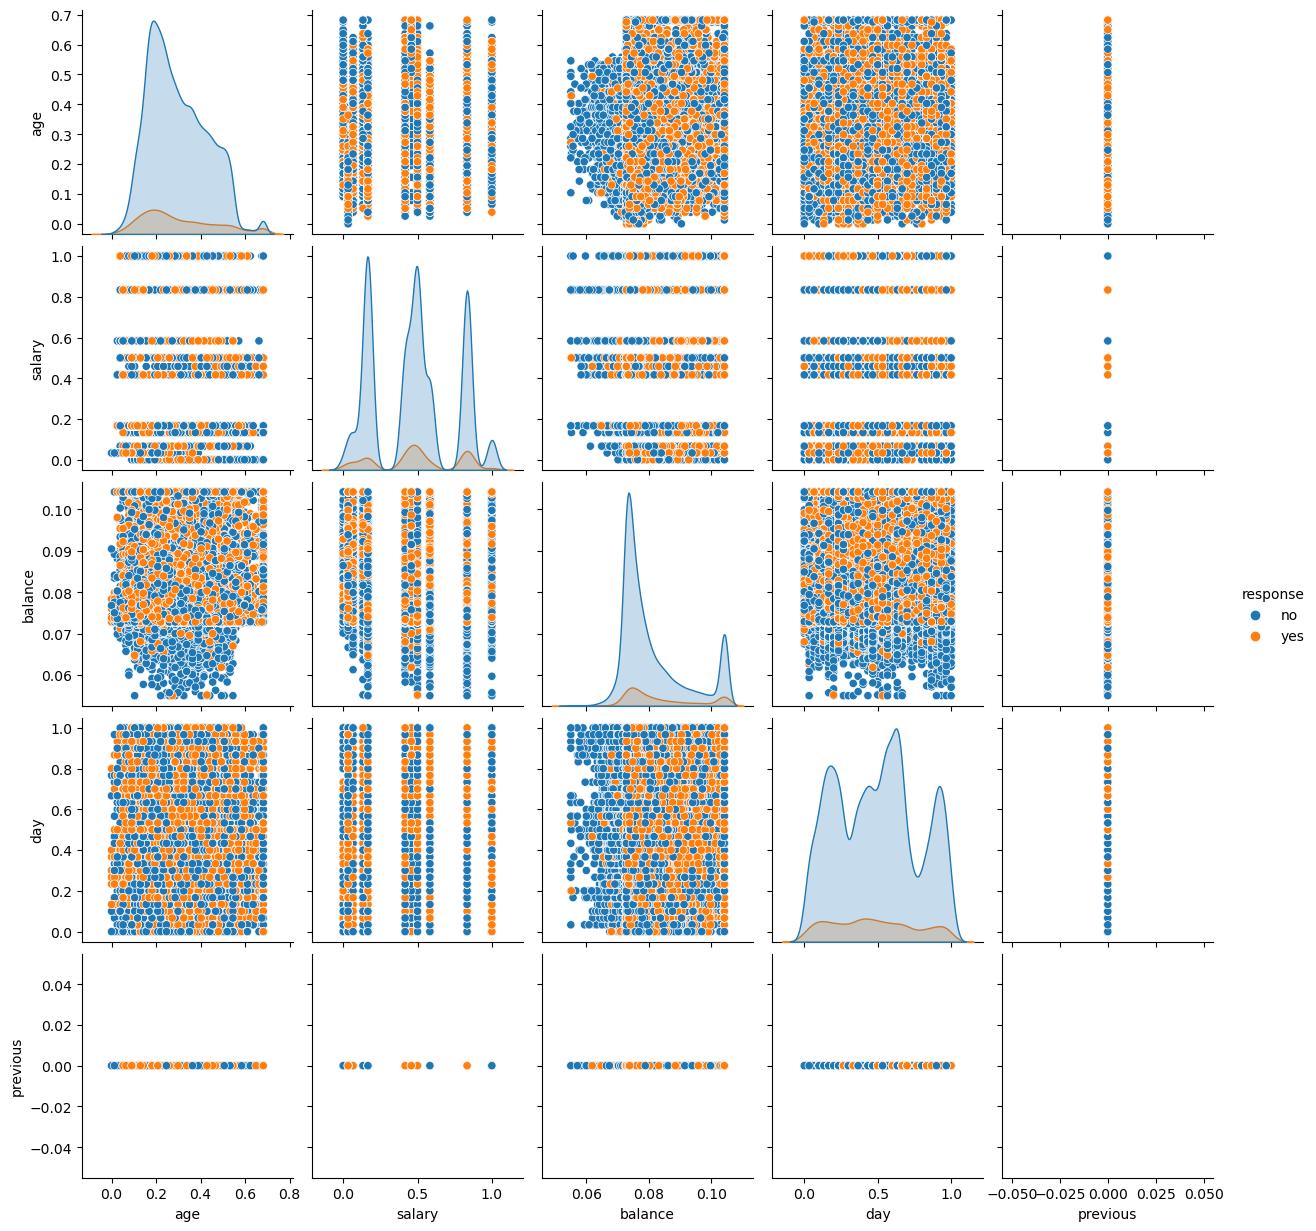

In [ ]:
sns.pairplot(df,hue="response")
plt.show()

# MULTIVARIATE  ANALYSIS

<AxesSubplot:>

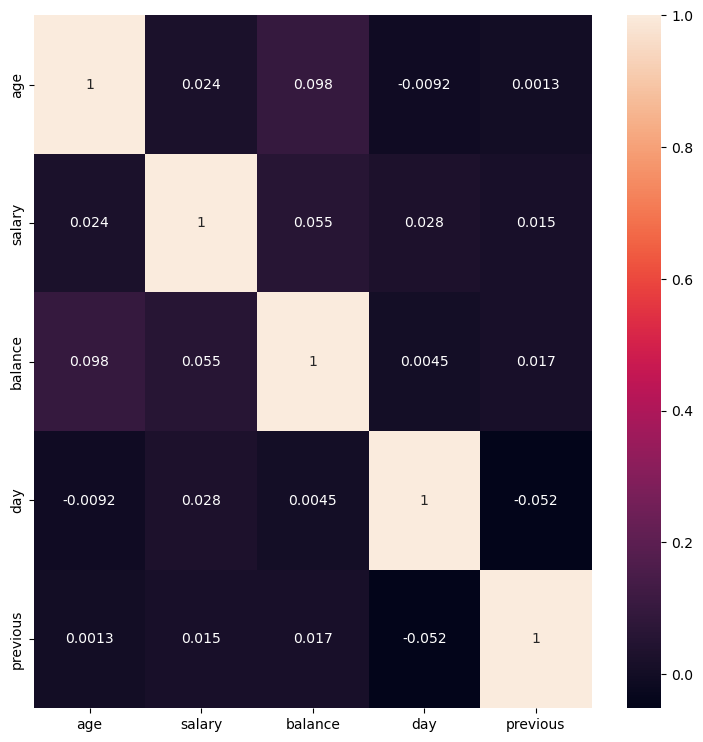

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cor,annot=True)

In [ ]:
x = df_numerical.drop("salary",axis = 1)
y = df_numerical.salary

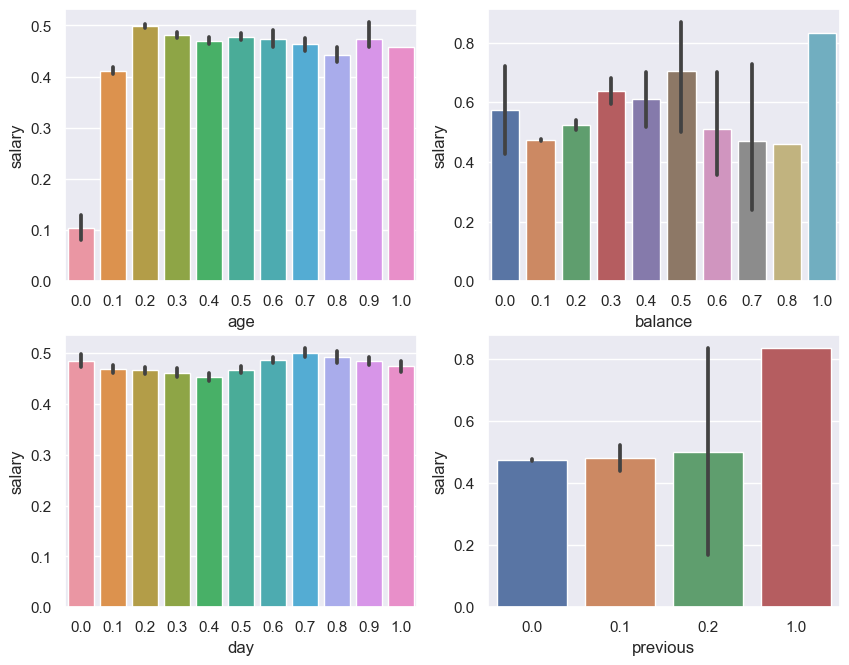

In [ ]:
plt.figure(figsize=(10,12))
sns.set()
for i ,feature in enumerate(x.columns):
    plt.subplot(3,2,i+1)
    sns.barplot(x.apply(lambda x:round(x,1))[feature],y)
    